In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\Iris.csv")

# Display the first few rows including Id and Species
print("🔹 First 5 Rows of the Dataset:")
print(df.head())

# Display column names and types
print("\n🔹 Dataset Info:")
print(df.info())


🔹 First 5 Rows of the Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), obje

In [3]:
from sklearn.preprocessing import StandardScaler

# Drop 'Id' and separate features
features = df.drop(columns=["Id", "Species"])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


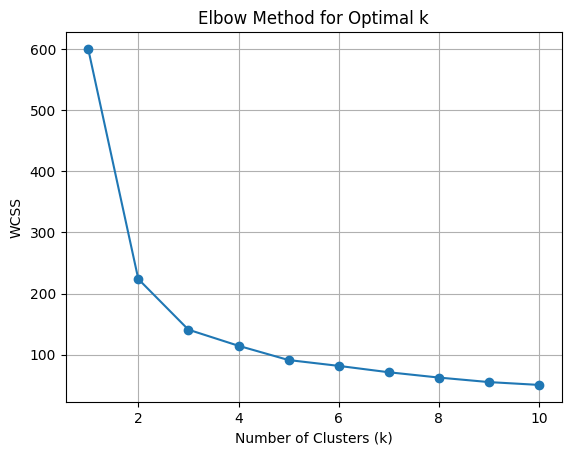

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [5]:
# Fit k-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df['kMeans_Cluster'] = kmeans_labels
print("\n🔹 Dataset with k-Means Cluster Labels:")
print(df.head())



🔹 Dataset with k-Means Cluster Labels:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   kMeans_Cluster  
0               1  
1               1  
2               1  
3               1  
4               1  


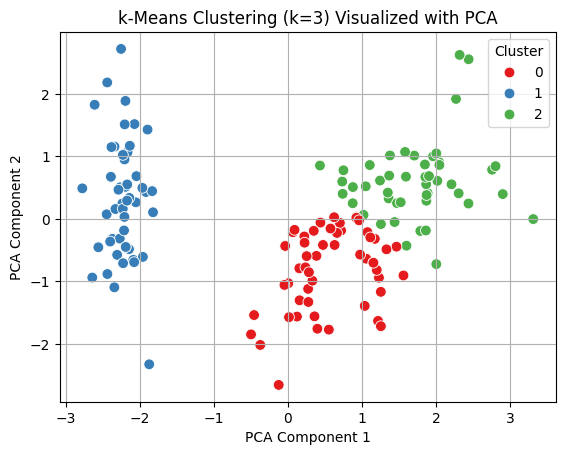

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Scatter plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1],
                hue=kmeans_labels, palette='Set1', s=60)
plt.title("k-Means Clustering (k=3) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


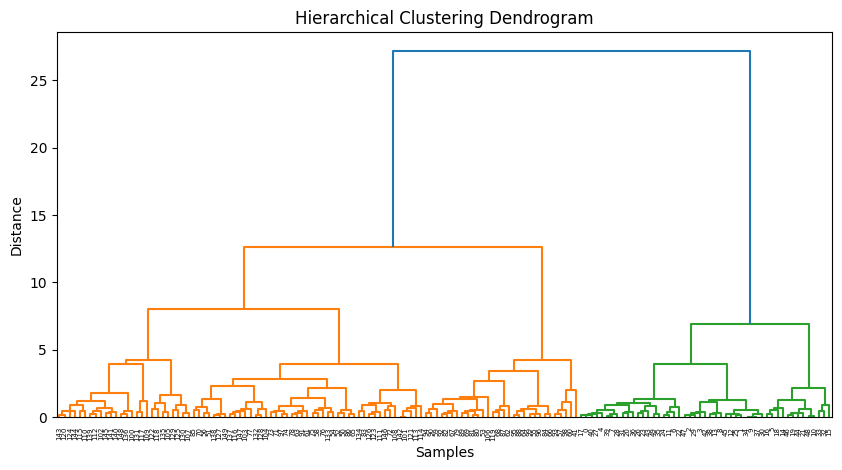


🔹 Dataset with Hierarchical Cluster Labels:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   kMeans_Cluster  Hierarchical_Cluster  
0               1                     1  
1               1                     1  
2               1                     1  
3               1                     1  
4               1                     1  


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Create linkage matrix
linked = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign hierarchical cluster labels (3 clusters)
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

# Show updated DataFrame
print("\n🔹 Dataset with Hierarchical Cluster Labels:")
print(df.head())


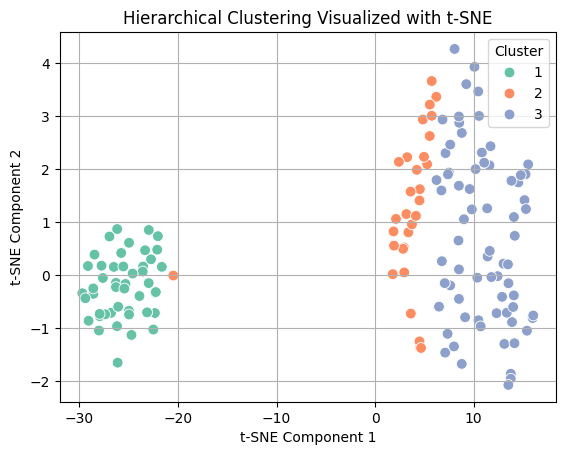

In [9]:
from sklearn.manifold import TSNE

# Apply t-SNE with correct parameters
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # n_iter is not needed unless explicitly setting it
tsne_data = tsne.fit_transform(scaled_features)

# Plot the t-SNE results
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1],
                hue=df['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title("Hierarchical Clustering Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
